# Implementation of CNN and finetuning a VGG Network for Image Classification

```
pip install opendatasets --> For installing datasets into your colab notebook directly from Kaggle.

input_shape = (image_height, image_width, image_channels) --> this is the format for input shape of a Conv2D layer.

model.summary() --> Displays the architecture of the model we have created so far.
```
The width and height of the images shrinks as you go deeper into the Conv2D network.

```
load_data() function is used in this format for images:
(train_x, train_y),(test_x, test_y) = dataset.load_data()

reshape() function is used inh this format:
train_x = train_x.reshape((dimensions))

to_categorical() is used for encoding in this format:
train_y = to_categorical(train_y)

evaluate() is used for evaluating the model in this format:
test_loss, test_acc = model.evaluate(test_x, test_y)
```


Training your model for the "Cats vs Dogs" dataset will give you a base accuracy of 71% without any regularization, we will boost this to 82% using data augmentation techniques. Further after feature extraction with the help of VGG, your accuracy will go upto 94% and finally after fine-tuning your network, you will achieve a final accuracy of 97%.

In [ ]:
# Loading a saved model:
from keras.models import load_model
vgg_model = load_model('/content/vgg16_compiled_model.h5')
custom_model_2 = load_model('/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small_2.h5')

# Saving the history of a trained model:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# Loading the history of a trained model:
import pickle
with open('/trainHistoryDict', 'rb') as file_pi:
    history = pickle.load(file_pi)

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

main_dir = '/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small'
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
validation_dir = os.path.join(main_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

In [ ]:
print(f'First ten contents of the train_cat_dir are: \n {os.listdir(train_cat_dir)[0:10]}')
print(f'First ten contents of the train_dog_dir are: \n {os.listdir(train_dog_dir)[0:10]}')

First ten contents of the train_cat_dir are: 
 ['cat.77.jpg', 'cat.53.jpg', 'cat.132.jpg', 'cat.72.jpg', 'cat.61.jpg', 'cat.89.jpg', 'cat.70.jpg', 'cat.20.jpg', 'cat.147.jpg', 'cat.25.jpg']
First ten contents of the train_dog_dir are: 
 ['dog.10.jpg', 'dog.2.jpg', 'dog.8.jpg', 'dog.3.jpg', 'dog.0.jpg', 'dog.1.jpg', 'dog.5.jpg', 'dog.4.jpg', 'dog.7.jpg', 'dog.9.jpg']


When you progress down the network, the size of the feature maps decreases and the depth of the feature maps increases.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3))) # depth, kernel_window, activation_function, input_shape
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Output shape = 1 because binary classification and that is also why sigmoid function has been used.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

# Setting up the data generators:
train_datagen = IDG(rescale = 1./255)
test_datagen = IDG(rescale = 1./255)

# Using the data generators on the data available:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')
# The generator 'yeilds' batches of images of shape (20,150,150,3) and binary labels of shape (20,)
for data_batch, labels_batch in train_generator:
    print('data_batch shape: ', data_batch.shape)
    print('labels_batch shape', labels_batch.shape)
    break # Generators endlessly loop over the images in the target folder therefore you have to use break to stop the generator.

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
data_batch shape:  (20, 150, 150, 3)
labels_batch shape (20,)
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, # Generator that generates the training data.
                    epochs = 30, # Total number of epochs.
                    validation_data = validation_generator)# Generator that generates the validation data.

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# Now plotting the loss and accuracy of the model during the training process:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In this model, overfitting is the number one reason for such poor accuracy (of 70~%) therefore we will mitigate overfitting. You already know overfitting can be mitigated using Dropout function or the weight decay (L2 regularization) but we will use Data Augmentation to reduce overfitting, this technique is almost fundamental to computer vision in today's age.

# Data Augmentation
Generating more training data from fewer training data samples by augmenting the data over a number of random transformations thet yeild-believeable looking images.
```
Setting up data augmentation using the ImageDataGenerator instance.
```
```
Create a datagen ---> Create a generator ---> Use the generator on the files directory.
```

In [ ]:
datagen = IDG(rotation_range = 40, # (0 to 180) A range in which randomly rotates pictures.
              width_shift_range = 0.2, # A fraction of total width in which to randomly translate pictures horizontally.
              height_shift_range = 0.2, # A fraction of total height in which to randomly translate pictures vertically.
              shear_range = 0.2, # Randomly applying shearing transformations.
              zoom_range = 0.2, # Randomly zooming inside pictures.
              horizontal_flip = True, # Randomly flipping half the images horizontally.
              fill_mode = 'nearest') # Strategy to filling in newly created pixels after the width/height/shear transforms.

Displaying some images after augmentation:

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import array_to_img

fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)] # Creates a list of file names in the 'training' --> 'cats' folder.
image_path = fnames[3] # Choose a random image to augment.
img = load_img(image_path, target_size = (150,150)) # Read and resize the image.
x = img_to_array(img) # Converts the image to a numpy array of shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Converts the image to the shape of (1, 150, 150, 3)

augment_count = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(augment_count) # Number of figure in one plot.
    imgplot = plt.imshow(array_to_img(batch[0]))
    augment_count += 1
    if(augment_count%4 == 0):
        break # Have to break the generator otherwise it keeps generating forever.

plt.show()

# A new model trained using dropout and data augmentation:

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])




```
This is how we use data augmentation on datasets.
This is usually done because we have less data available for training our machine learning model.
```



In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagen = IDG(rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)

test_datagen = IDG(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator)

model.save('cats_and_dogs_small_2.h5')

Now we have two trained models for solving this little problem, however their accuracy still isn't all that great. Therefore we will be looking at a new technique for achieving better accuracy. Using pretrained Convnets.

# Pretrained Convnet - VGG16
These Convnets have already been trained on previous datasets and they have a good accuracy score. All we need to do from these Convnets is extract the features from the convolutional base and create our own densely connected layers for tackling the classification problem.

There are two steps to making pretrained Convnets work:-
- Feature Extraction
- Fine Tuning

## 1. Feature Extraction

Downloading the pretrained convnet we will use further:

In [ ]:
# The pretrained Convnet we will be using here is the VGG16 from keras.applications.
# This Convnet has been trained on the ImageNet Dataset.
# ImageNet dataset has 1.4 million labeled images and 1000 classes all pertaining to nature and animals.
# There are many other pretrained Convnets that use the ImageNet dataset:
# Xception, Inception V3, ResNet50, VGG16, VGG19, MobileNet
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False, # include_top decides whether to include the dense layer of the application or only the convolutional base.
                  input_shape = (150,150,3))

58889256/58889256 [==============================] - 3s 0us/step


Now that we have the convolutional base, we need to stick our densely connected layer on top of this.

Again, there are 2 ways of achieving that:
- Running the convolutional base through the data set, recording its output as a Numpy array and giving this output to a standalone Dense() classifier as an input. {Fast and cheap but this technique will not allow you to use data augmentation.}
- Extending the model by adding Dense layers on top, and running the whole thing end to end on the input data. {Can use data augmentation but very expensive because the Convolutional base runs for every image multiple times based on how you augment the data.}

**Method 1: Without data augmentation:**

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator as IDG

base_dir = '/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

datagen = IDG(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512)) # (4,4,512) is the output of the last layer of the pretrained convnet. You can verify using the .summary() function.
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = (150,150),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
    i = 0 # To generate images till the sample count.
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i*batch_size>=sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
test_features, test_labels = extract_features(test_dir, 1000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

# Features have been extracted, now we flatten them manually so we can feed them into the densely connected layers.

train_features = np.reshape(train_features, (2000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))

# Now we can design our densely connected classifier and train it on the data we extracted.

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 2e-5),
              metrics = ['acc'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

In [ ]:
model.save('vgg16_compiled_model.h5')

**2. With Data Augmentation:**

Since running the entire conv_base on the dataset would be too expensive in terms of resource usage, we freeze the layers of the conv_base because we do not want the weights updating during the training process. This is done in the following way:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

freezed_model = Sequential()
freezed_model.add(conv_base)
freezed_model.add(Flatten())
freezed_model.add(Dense(256, activation = 'relu'))
freezed_model.add(Dense(1, activation = 'sigmoid'))

conv_base.trainable = False

from keras.preprocessing.image import ImageDataGenerator as IDG
from keras import optimizers

# Data augmentation being done with the train_datagen:
train_datagen = IDG(rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')

test_datagen = IDG(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

print(f'This is the number of trainable weights after freezing the conv_base: {len(freezed_model.trainable_weights)}')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
This is the number of trainable weights after freezing the conv_base: 4


In [ ]:
freezed_model.compile(loss = 'binary_crossentropy',
                      optimizer = optimizers.RMSprop(learning_rate = 2e-5),
                      metrics = ['acc'])

history = freezed_model.fit(train_generator,
                            steps_per_epoch = 100,
                            epochs = 30,
                            validation_data = validation_generator,
                            validation_steps = 50)

In [ ]:
freezed_model.save('freezed_cats_vs_dogs.h5')

In [ ]:
# Saving the history of the freezed model:
import pickle
with open('freezed_model', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

## 2. Fine Tuning

In feature extraction, the whole conv_base of the VGG16 model was frozen and only the fully connected dense classifier was being trained on the data. However in fine-tuning, some of the top layers of conv_base are unfreezed so these layers that have learnt the general representations can learn more specific representations along with the Dense layers that we have added.

One thing to keep in mind when you are fine-tuning a pretrained network is that the layers that you add on top must already be trained first with the whole pretrained network frozen and only after that, unfreeze the top layers of the pretrained network and train both the added layers and the pretrained network jointly.

This is done because if the layers that are being added on top do not have learned representations, the weight updation on the unfreezed layers will be massive and might completely change/retrain the representations learned by the pretrained network.

In [ ]:
import os
from keras.applications import VGG16
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator as IDG

from google.colab import drive
drive.mount('/content/drive')


main_dir = '/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small'
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
validation_dir = os.path.join(main_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150,150,3))

# First we have to add the conv_base as it is to the model and train it, then fine-tune the toplayers of the conv_base.
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Length of trainable_weights at this point is 30.

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              metrics = ['acc'])

train_datagen = IDG(rescale = 1./255,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    rotation_range = 40,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = IDG(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 50)

# Now we unfreeze the fifth Conv2D block of conv_base and train the model again.
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50)

In [ ]:
model.save('finetuned_cats_vs_dogs.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150,150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test acc: ', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-4-002239ceb912>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)


test acc:  0.9679999947547913


In [ ]:
# IGNORE CELL
dummy_model = load_model('/content/freezed_cats_vs_dogs.h5')
dummy_model.summary()

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150,150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

test_loss, test_acc = dummy_model.evaluate_generator(test_generator, steps = 50)
print('test acc: ', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Found 1000 images belonging to 2 classes.


<ipython-input-23-86dc42ea418a>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = dummy_model.evaluate_generator(test_generator, steps = 50)


test acc:  0.8970000147819519


# Visualizing learned representations

## 1. Visualizing Intermediate Activations

Visualizing intermediate activations is essentially displaying the feature maps of each individual convolution and pooling layers in a network. For visualizing intermediate activations, we shall use the small model we created on cats_vs_dogs.

WE WILL CALL THE OUTPUT OF A LAYER AS AN ACTIVATION.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
current = load_model('/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small_2.h5')
current.summary()

In [ ]:
# Now let us get a picture of a cat from the test dataset, not from the part of the images the model was trained on.
img_path = '/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.utils import load_img, img_to_array # For preprocessing the image into a 4D tensor.
import numpy as np

img = load_img(img_path, target_size = (150,150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

# We did the preprocessing becauase the model was trained on that format of images:
print(img_tensor.shape)

(1, 150, 150, 3)


In [ ]:
# Now let us display the picture using matplotlib
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# Next let us create a Keras model that takes batches of images as inputs, and outputs the activation of all convolution and pooling layers in the network.
from keras import models

layer_outputs = [layer.output for layer in current.layers[:8]] # Extracts the output of the top 8 layers of the network. [First 8 layers of the network are the convolution and pooling layers.]
activation_model = models.Model(inputs = current.input,
                                outputs = layer_outputs) # Creates a model that will return these outputs, given the model input.

# Running the model in predict mode.
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape) # (1, 148, 148, 32): It is a 148x148 feature map with 32 channels.

1/1 [==============================] - 8s 8s/step
(1, 148, 148, 32)


Shape of a feature map signifies the following: (length, size, size, num_of_features)

In [ ]:
# Since the activation has 32 channels, let's try plotting the fourth channel of the activation of the first layer.
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, : , :, 4],
            cmap = 'viridis')

In [ ]:
# Now let us try seeing the 10th channel of this particular activation.
plt.matshow(first_layer_activation[0, : , :, 10],
            cmap = 'viridis')

In [ ]:
# Now we shall try visualizing every channel in every alternate activation.
import numpy as np
# Creating a layer_names list so we can plot the channels against their own names.
layer_names = []
for layer in current.layers[:8:2]: # A jump of 2 so that we only display the actia
    layer_names.append(layer.name)

images_per_row = 10
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # Number of features in the feature map, the feature map has shape (length, size, size, n_features)
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row # Number of columns on the display figure
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, : , :, col * images_per_row + row] # Traversing the features of the feature map from start to end.

            # Now we post-process the image to make it visually palatable.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size:(col+1) * size,
                         row * size:(row+1) * size] = channel_image

    scale = 1./size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

There are a few things to note here:
1. The first layer acts as a collection of various edge detectors. At that stage, the
activations retain almost all of the information present in the initial picture.
2. As you go higher, the activations become increasingly abstract and less visually
interpretable. They begin to encode higher-level concepts such as “cat ear” and
“cat eye.” Higher presentations carry increasingly less information about the
visual contents of the image, and increasingly more information related to the
class of the image.
3. The sparsity of the activations increases with the depth of the layer: in the first
layer, all filters are activated by the input image; but in the following layers,
more and more filters are blank. This means the pattern encoded by the filter
isn’t found in the input image.

# Graphs and Confusion Matrix

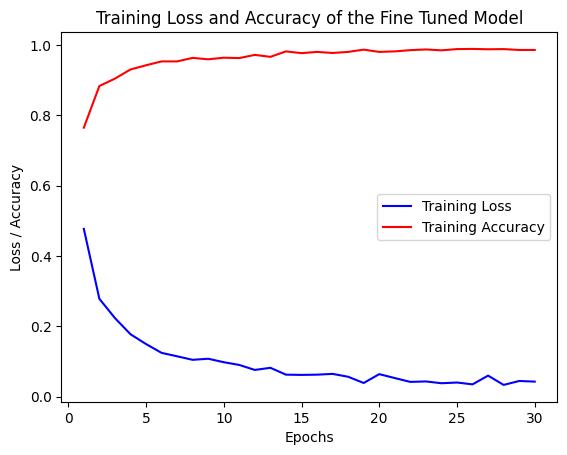

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 31)  # Epoch numbers

# Training data
loss = [0.4772, 0.2782, 0.2235, 0.1775, 0.1496, 0.1245, 0.1147, 0.1047, 0.1078, 0.0979,
        0.0901, 0.0759, 0.0820, 0.0625, 0.0618, 0.0625, 0.0647, 0.0565, 0.0388, 0.0640,
        0.0528, 0.0419, 0.0432, 0.0381, 0.0401, 0.0349, 0.0598, 0.0333, 0.0445, 0.0427]

accuracy = [0.7650, 0.8835, 0.9045, 0.9305, 0.9425, 0.9535, 0.9535, 0.9635, 0.9595, 0.9640,
            0.9630, 0.9720, 0.9665, 0.9820, 0.9770, 0.9805, 0.9775, 0.9805, 0.9870, 0.9805,
            0.9820, 0.9855, 0.9875, 0.9850, 0.9885, 0.9890, 0.9880, 0.9885, 0.9860, 0.9860]

# Validation data
val_loss = [0.2237, 0.2522, 0.1991, 0.1126, 0.1239, 0.1180, 0.0806, 0.0947, 0.0882, 0.1139,
            0.1246, 0.1337, 0.1155, 0.1072, 0.1177, 0.1346, 0.1053, 0.0988, 0.1309, 0.1299,
            0.2524, 0.1179, 0.1096, 0.1593, 0.1312, 0.1223, 0.1417, 0.1768, 0.1308, 0.1272]

val_accuracy = [0.9150, 0.8790, 0.9020, 0.9650, 0.9430, 0.9610, 0.9710, 0.9670, 0.9680, 0.9520,
                0.9610, 0.9590, 0.9550, 0.9730, 0.9690, 0.9630, 0.9660, 0.9650, 0.9590, 0.9630,
                0.9460, 0.9670, 0.9650, 0.9720, 0.9630, 0.9700, 0.9660, 0.9650, 0.9690, 0.9680]

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.title('Training Loss and Accuracy of the Fine Tuned Model')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

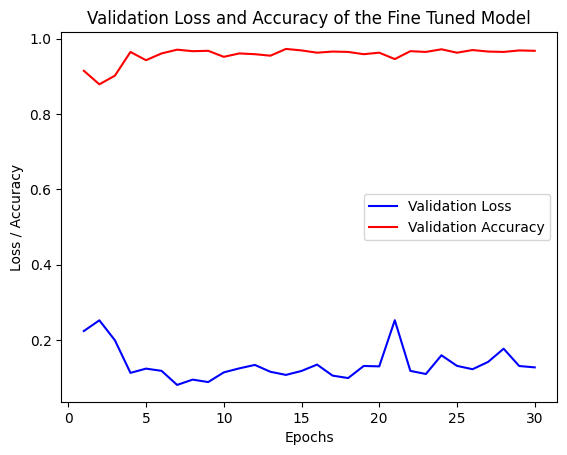

In [ ]:
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Validation Loss and Accuracy of the Fine Tuned Model')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix
from tensorflow.keras.models import load_model
test_directory = '/content/drive/MyDrive/Cats vs Dogs/cats_and_dogs_small/test'

fine_tuned = load_model('/content/drive/MyDrive/Cats vs Dogs/finetuned_cats_vs_dogs.h5')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255)

# Load the test images and labels
test_generator = data_generator.flow_from_directory(directory = test_directory,
                                                    target_size = (150, 150),
                                                    class_mode='categorical',
                                                    shuffle = False)
# Get the true labels
y_test = test_generator.classes

Found 1000 images belonging to 2 classes.


In [ ]:
# Generate the predicted labels for the test images
y_pred = fine_tuned.predict(test_generator)

# y_pred = y_pred.argmax(axis = 1)

32/32 [==============================] - 260s 8s/step


In [ ]:
import numpy as np
y_temp = y_pred

y_temp_reshaped = y_temp.reshape((1000, ))

print(y_temp_reshaped.shape)

y_temp_tolist = y_temp_reshaped

y_temp_tolist = y_temp_tolist.tolist()

print(type(y_temp_tolist))

for i, prediction in enumerate(y_temp_tolist):
    if prediction >= 0.5:
        y_temp_tolist[i] = 1
    else:
        y_temp_tolist[i] = 0

print(y_temp_tolist[5])

(1000,)
<class 'list'>
0


In [ ]:
y_pred_normalized = np.array(y_temp_tolist)
print(type(y_pred_normalized))
print(y_pred_normalized.shape)
print(y_pred_normalized)

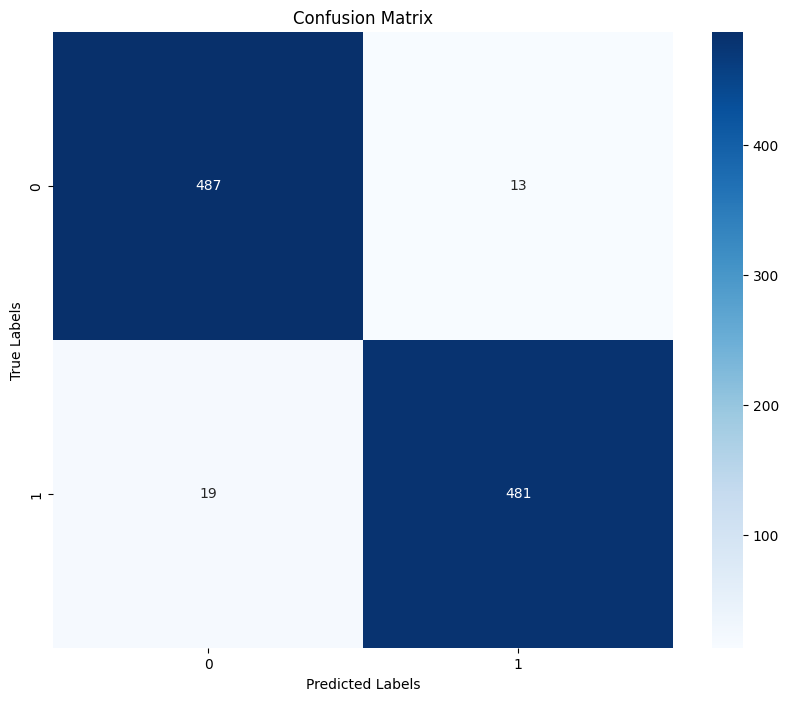

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_normalized)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[487  13]
 [ 19 481]]
